# netCDF

## We are going to make an animated gif and not embarass a friend!



In [1]:
# The usual libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

# The new ones
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
#import contextily as ctx

import datetime

You are going to read in a netcdf file.  Plot sea surface temperatures.  Animate them for the year and turn in an animated GIF.  

The links to get the sea surface data don't always work.  Be patient.  WE DOWNLOADED THIS YESTERDAY.

* Start here http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html#detail
* I have to scroll up. 
* click on daily mean and the words 'select list' which are tiny and to the right.
* then click 'see list' for the Daily Mean
* then click a year and it will download.  Do not do 2021.  It is not a full year because we aren't done yet!
* It is a 400mb file.  It might be slow if you are on wifi
* Now make sure it is saved in your working directory and we can open it.  url is the file name.  
* It is just like the last packet!

In [2]:
url=('sst.day.mean.2019.nc')
f=netCDF4.Dataset(url)

You saved the file into "f".  So if we print f we will see part of it.  But remember the f is not the whole file but more like a function that we can then call to get at the whole file.  We will use "f." notation to learn about the file.  You know the drill!

In [3]:
print (f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surface Temperature (OISST) Analysis, Version 2.1
    institution: NOAA/National Centers for Environmental Information
    source: NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    version: Version 2.1
    comment: Reynolds, et al.(2007) Daily High-Resolution-Blended Analyses for Sea Surface Temperature (available at https://doi.org/10.1175/2007JCLI1824.1). Banzon, et al.(2016) A long-term record of blended satellite and in situ sea-surface temperature for climate monitoring, modeling and environmental studies (available at https://doi.org/10.5194/essd-8-165-2016). Huang et al. (2020) Impr

<ipython-input-3-b30fe898003a>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f)


So what do we have?  We have 365 time steps of lat and long with sea surface temperatures at every day.  so lets try to pull it out.  It is easy....

In [4]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [79988. 80352.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-4-bcbaa96a41be>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['time'])


We are going to come back to the time values.  

Now lets look at latitude.  

In [5]:
print (f.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
    actual_range: [-89.875  89.875]
    axis: Y
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-5-bd934758bff6>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['lat'])


There are 720 locations for latitude.  Or 4 values every degree

Now lets look at longitude

In [6]:
print (f.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
    actual_range: [1.25000e-01 3.59875e+02]
    axis: X
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-6-3928fc27ac36>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['lon'])


longitude has 1440 values or twice as many as latitude as it goes around the whole globe

Now we can look at the actual sea surface temperature.

In [7]:
print (f.variables['sst'])

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Daily Sea Surface Temperature
    units: degC
    valid_range: [-3. 45.]
    missing_value: -9.96921e+36
    precision: 2.0
    dataset: NOAA High-resolution Blended Analysis
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Observations
    actual_range: [-1.8  36.79]
unlimited dimensions: time
current shape = (365, 720, 1440)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-7-1f712b81bbbd>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print (f.variables['sst'])


The sst is really cool.  Think of it as 365 days of data, each in an array of values in the shape of 720 by 1440.  So for each day we will have a map of sea surface temperatures.

Can we actually look at some numbers?  

In [8]:
 f.variables['lat'][:]

masked_array(data=[-89.875, -89.625, -89.375, -89.125, -88.875, -88.625,
                   -88.375, -88.125, -87.875, -87.625, -87.375, -87.125,
                   -86.875, -86.625, -86.375, -86.125, -85.875, -85.625,
                   -85.375, -85.125, -84.875, -84.625, -84.375, -84.125,
                   -83.875, -83.625, -83.375, -83.125, -82.875, -82.625,
                   -82.375, -82.125, -81.875, -81.625, -81.375, -81.125,
                   -80.875, -80.625, -80.375, -80.125, -79.875, -79.625,
                   -79.375, -79.125, -78.875, -78.625, -78.375, -78.125,
                   -77.875, -77.625, -77.375, -77.125, -76.875, -76.625,
                   -76.375, -76.125, -75.875, -75.625, -75.375, -75.125,
                   -74.875, -74.625, -74.375, -74.125, -73.875, -73.625,
                   -73.375, -73.125, -72.875, -72.625, -72.375, -72.125,
                   -71.875, -71.625, -71.375, -71.125, -70.875, -70.625,
                   -70.375, -70.125, -69.875, -69.6

So we can pull out numbers and look at them.  They all come out in numpy arrays.  

In [9]:
type(f.variables['lat'][:])

numpy.ma.core.MaskedArray

But we can pull them out and set them to a variable. We are not going to use Pandas and just leave everything in numpy arrays for today.  This might take a minute because you are putting 400 Mb of data into memory.  Your computer might get cranky and we might have to restart at some point.

In [10]:
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
sst=f.variables['sst'][:]
time=f.variables['time'][:]

You can look at the shape of each element.  Remember 1 year has 365 days!

In [11]:
np.shape(time)

(365,)

In [12]:
np.shape(lon)

(1440,)

In [13]:
np.shape(lat)

(720,)

In [14]:
np.shape(sst)

(365, 720, 1440)

So what do we have?  We have a lat/lon grid.  Then each point has a sst.  Then we have that repeated 365 times for each day of the year.  

Let's make our easy plot and then we will make the nice map.     

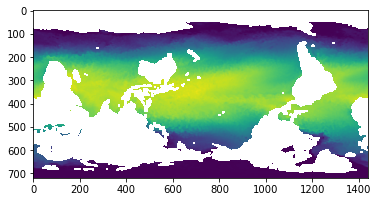

In [15]:
fig,ax=plt.subplots()
ax.imshow(sst[0])

What just happened?  This did not make a map?  It just took the sst array and plotted it.  Each array point has a latittude and longitude we could use to make a map.  But we didn't do that.  We just did a raw imshow which shows the array.  It is a nice start.   Read the help and see if you can flip the array? 

In [16]:
?plt.imshow

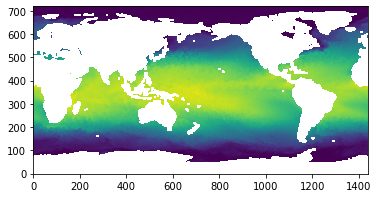

In [18]:
fig,ax=plt.subplots()
ax.imshow(sst[0],origin='lower')

imshow is nice as a quick way to show an array but it is not a map.  The next way to make a better map is pcolormesh.  It uses the lat and long so it is better but still not a map.  

<ipython-input-19-ebfd4181c561>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(lon,lat,sst[0])


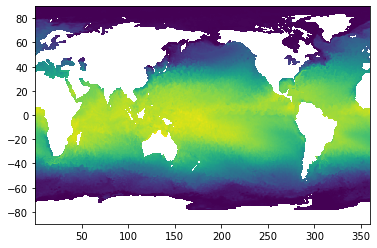

In [19]:
fig,ax=plt.subplots()
ax.pcolormesh(lon,lat,sst[0])

Lets try to make that nicer

* Let's go back and grab our last map and paste it in here.  You should be able to make it work

Text(0.5, 1.0, 'Temp\n(°C)')

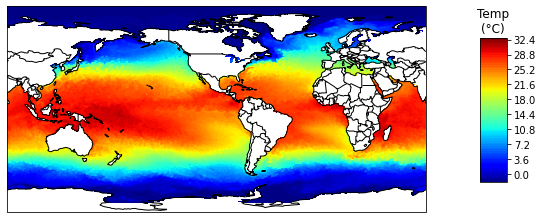

In [41]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100)) 
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

data, lonW = add_cyclic_point(sst[0], coord=lon)  # gets rid of white line and use data for plot.
air_contour=ax.contourf(lonW, lat, data,
            transform=ccrs.PlateCarree(),
            cmap='jet',levels=100)

cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4])  #x, y, xwidth, y height 
fig.colorbar(air_contour, cax=cbar_ax)
cbar_ax.set_title('Temp\n(\N{DEGREE SIGN}C)')

### Let's make it look better
-  I am going to make the land a slightly different color
-  Then we need to set the levels better.  The reason is different days have different ranges.  
-  We will use linspace to get levels and then pass the levels.  You are setting the range.  For contourf you need to be over the min and max.  

Text(0.5, 1.0, 'Temp\n(°C)')

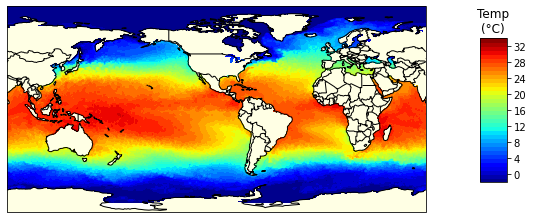

In [44]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100)) 
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS,edgecolor='k')
ax.add_feature(cartopy.feature.LAND,facecolor='xkcd:off white')

data, lonW = add_cyclic_point(sst[0], coord=lon)  # gets rid of white line and use data for plot.
levels=np.linspace(-2,34,37)
air_contour=ax.contourf(lonW, lat, data,
            transform=ccrs.PlateCarree(),
            cmap='jet',levels=levels)

cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4])  #x, y, xwidth, y height 
fig.colorbar(air_contour, cax=cbar_ax)
cbar_ax.set_title('Temp\n(\N{DEGREE SIGN}C)')

### remember that we have 365 days of data.  
-  So lets set a parameterto day number that we can change
-  If you know me you should know a for loop is coming and we are stepping our way there.  
-  Now make a variable called "nday" and set it equal to the day you want to plot.  For example January 31 will be 30 because python starts at 0.  
-  Compare day 0 and day 180.  Do the temperatures look different?  

Text(0.5, 1.0, 'Temp\n(°C)')

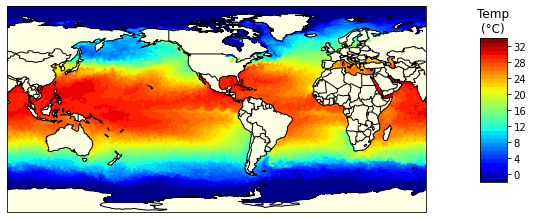

In [46]:
nday=180

fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100)) 
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS,edgecolor='k')
ax.add_feature(cartopy.feature.LAND,facecolor='xkcd:off white')

data, lonW = add_cyclic_point(sst[nday], coord=lon)  # gets rid of white line and use data for plot.
levels=np.linspace(-2,34,37)
air_contour=ax.contourf(lonW, lat, data,
            transform=ccrs.PlateCarree(),
            cmap='jet',levels=levels)

cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4])  #x, y, xwidth, y height 
fig.colorbar(air_contour, cax=cbar_ax)
cbar_ax.set_title('Temp\n(\N{DEGREE SIGN}C)')

That is a good looking map!!!!

I am starting to see a path forward for how to make a movie of the temperatures over the year.  
-  Python is not perfect for making movies.  
-  We are going to make a modern flip book.  
-  We will save an image for each frame and then we can use python or a web program to put them together.  It is like turning a burst on your phone into a movie.  
-  We want to end with an aniamted GIF with python or a program.  Things we will need to be able to do.

How do we do thi??
* Loop over all the data.
* Figure out the date for the data.
* plot the data.
* save the data in a unique file for each day
* use python/website to put it all togehter.  

So we need to learn each of these steps.  I will start with figuring out the date for each slice.  

### Back to our crazy dates!

In [37]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [79988. 80352.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used


Still crazy!  
Time since 1800 in days!  Let's deal with it like last time.  Go cut and paste what we did. 

-  Set your startdate
-  calculate your datedelta
-  Add them together to figure out your date
-  use ndays again
-  Change ndays and see if it 


In [50]:
nday=180
startdate=datetime.datetime(1800,1,1)
datedelta=datetime.timedelta(days=time[nday])
mapdate=startdate+datedelta
print ("The date is {:%B %d, %Y}".format(mapdate))

The date is June 30, 2019


### We need a for loop
-  I do not know the best way to for loop here.
-  I see three options
-  just give us a number to loop 20.  e.g. 365.  But would get an error on a leap year.
-  We could do an enumerate loop.  
-  We could also just loop to length of a parameter.  
-  I am going to do np.arange(len(time))
-  then print nday

In [53]:
for nday in np.arange(len(time)):
    print(nday)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Now print each day in the foor loop.  to save memory put the least amount of things needed in a for loop.  You can do this!

The date on day 0 is January 01, 2019
The date on day 1 is January 02, 2019
The date on day 2 is January 03, 2019
The date on day 3 is January 04, 2019
The date on day 4 is January 05, 2019
The date on day 5 is January 06, 2019
The date on day 6 is January 07, 2019
The date on day 7 is January 08, 2019
The date on day 8 is January 09, 2019
The date on day 9 is January 10, 2019
The date on day 10 is January 11, 2019
The date on day 11 is January 12, 2019
The date on day 12 is January 13, 2019
The date on day 13 is January 14, 2019
The date on day 14 is January 15, 2019
The date on day 15 is January 16, 2019
The date on day 16 is January 17, 2019
The date on day 17 is January 18, 2019
The date on day 18 is January 19, 2019
The date on day 19 is January 20, 2019
The date on day 20 is January 21, 2019
The date on day 21 is January 22, 2019
The date on day 22 is January 23, 2019
The date on day 23 is January 24, 2019
The date on day 24 is January 25, 2019
The date on day 25 is January 26, 2

#### this might not make sense.  

If we are going to make 365 plots one for each day.  We need to save each to a file.  So we need to create a file name we can send to savfig.  

-  We will want our files nicely oraganized.  
-  We could use the dates to name the files.  But we will lose their order.
-  Instead we want a number in the file name.  
-  But we will want a three digit number in the name.  This will keep them all in order.  
-  it will look like sst_000.png, sst_001.png, sst_002.png, .... sst_364.png.  
-  We can use format to pad the numbers.  You remember this?  https://stackoverflow.com/questions/339007/nicest-way-to-pad-zeroes-to-string

In [56]:
startdate=datetime.datetime(1800,1,1)
for nday in np.arange(len(time)):
    datedelta=datetime.timedelta(days=time[nday])
    mapdate=startdate+datedelta
    filename="sst_{:03d}.png".format(nday)
    print ("The date on day {} is {:%B %d, %Y} with filename {}".format(nday,mapdate,filename))

The date on day 0 is January 01, 2019 with filename sst_000.png
The date on day 1 is January 02, 2019 with filename sst_001.png
The date on day 2 is January 03, 2019 with filename sst_002.png
The date on day 3 is January 04, 2019 with filename sst_003.png
The date on day 4 is January 05, 2019 with filename sst_004.png
The date on day 5 is January 06, 2019 with filename sst_005.png
The date on day 6 is January 07, 2019 with filename sst_006.png
The date on day 7 is January 08, 2019 with filename sst_007.png
The date on day 8 is January 09, 2019 with filename sst_008.png
The date on day 9 is January 10, 2019 with filename sst_009.png
The date on day 10 is January 11, 2019 with filename sst_010.png
The date on day 11 is January 12, 2019 with filename sst_011.png
The date on day 12 is January 13, 2019 with filename sst_012.png
The date on day 13 is January 14, 2019 with filename sst_013.png
The date on day 14 is January 15, 2019 with filename sst_014.png
The date on day 15 is January 16, 2

But I will want to put the files into a subfolder.  So if you make a folder named sst/ we could add the prefix to the name.  You need to make a folder on your computer. 

In [57]:
startdate=datetime.datetime(1800,1,1)
for nday in np.arange(len(time)):
    datedelta=datetime.timedelta(days=time[nday])
    mapdate=startdate+datedelta
    filename="sst/sst_{:03d}.png".format(nday)
    print ("The date on day {} is {:%B %d, %Y} with filename {}".format(nday,mapdate,filename))

The date on day 0 is January 01, 2019 with filename sst/sst_000.png
The date on day 1 is January 02, 2019 with filename sst/sst_001.png
The date on day 2 is January 03, 2019 with filename sst/sst_002.png
The date on day 3 is January 04, 2019 with filename sst/sst_003.png
The date on day 4 is January 05, 2019 with filename sst/sst_004.png
The date on day 5 is January 06, 2019 with filename sst/sst_005.png
The date on day 6 is January 07, 2019 with filename sst/sst_006.png
The date on day 7 is January 08, 2019 with filename sst/sst_007.png
The date on day 8 is January 09, 2019 with filename sst/sst_008.png
The date on day 9 is January 10, 2019 with filename sst/sst_009.png
The date on day 10 is January 11, 2019 with filename sst/sst_010.png
The date on day 11 is January 12, 2019 with filename sst/sst_011.png
The date on day 12 is January 13, 2019 with filename sst/sst_012.png
The date on day 13 is January 14, 2019 with filename sst/sst_013.png
The date on day 14 is January 15, 2019 with 

Now we know how to
* Make a title name with the date.
* make a file name
* loop over the array

But before you begin you need to think a little.  

Each timestep we are going to make a figure, make a map, and save it.  

But making a figure and map are "expensive" and eat up cpu.  And you need to this 365 times.  So when you loop you want to set as many things before your loop as possible.  Then you can use ax.cla() to clear the axes.  If you don't clear the axis you keep putting each day over the last day and you computer will grind to a halt.  So i would test things by running just a few days.  You can do this by only calling the first so many parts of the array.  

Don't forget a title with your name and date

TRICK: the first time using the for loop do not go over the np.arange(len(time)).  just do np.arange(10).  This way if something goes wrong it just happens 10 times and not 365.  

TRICK:  you are making 365 files.  make them small.  use dpi=50

The websites for making a gif are full or viruses.  I would use python.  

I found this stackoverflow example.  

https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python

Look at the answer and just update with your directories!

BUT THERE IS A BIG PROBLEM!  If you look up os.listdir It says the order of files is arbitrary.  On some computers is works and on some it doesn't and it jumbles the order.

We have two solutions.
1.  Kai came up with a great one about reading the files in (See below)

2.  I tryed to understand what went wrong and it looks like we can sort our files.  So I googled this "python listdir in order".  It then restated that listserv jumbles the order.  But it says you can add the sorted function to the for loop.  See below!


PS.  This is slow.  My computer takes 30 minutes and makes a lot of noise!

PPS.  You cannot open your movie in preview.  Use a web browser.


Brian's Map January 01, 2019
Brian's Map January 02, 2019


<ipython-input-69-1c80be8b3878>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100))


Brian's Map January 03, 2019
Brian's Map January 04, 2019
Brian's Map January 05, 2019
Brian's Map January 06, 2019
Brian's Map January 07, 2019
Brian's Map January 08, 2019
Brian's Map January 09, 2019
Brian's Map January 10, 2019
Brian's Map January 11, 2019
Brian's Map January 12, 2019
Brian's Map January 13, 2019
Brian's Map January 14, 2019
Brian's Map January 15, 2019
Brian's Map January 16, 2019
Brian's Map January 17, 2019
Brian's Map January 18, 2019
Brian's Map January 19, 2019
Brian's Map January 20, 2019
Brian's Map January 21, 2019
Brian's Map January 22, 2019
Brian's Map January 23, 2019
Brian's Map January 24, 2019
Brian's Map January 25, 2019
Brian's Map January 26, 2019
Brian's Map January 27, 2019
Brian's Map January 28, 2019
Brian's Map January 29, 2019
Brian's Map January 30, 2019
Brian's Map January 31, 2019
Brian's Map February 01, 2019
Brian's Map February 02, 2019
Brian's Map February 03, 2019
Brian's Map February 04, 2019
Brian's Map February 05, 2019
Brian's M

Brian's Map October 26, 2019
Brian's Map October 27, 2019
Brian's Map October 28, 2019
Brian's Map October 29, 2019
Brian's Map October 30, 2019
Brian's Map October 31, 2019
Brian's Map November 01, 2019
Brian's Map November 02, 2019
Brian's Map November 03, 2019
Brian's Map November 04, 2019
Brian's Map November 05, 2019
Brian's Map November 06, 2019
Brian's Map November 07, 2019
Brian's Map November 08, 2019
Brian's Map November 09, 2019
Brian's Map November 10, 2019
Brian's Map November 11, 2019
Brian's Map November 12, 2019
Brian's Map November 13, 2019
Brian's Map November 14, 2019
Brian's Map November 15, 2019
Brian's Map November 16, 2019
Brian's Map November 17, 2019
Brian's Map November 18, 2019
Brian's Map November 19, 2019
Brian's Map November 20, 2019
Brian's Map November 21, 2019
Brian's Map November 22, 2019
Brian's Map November 23, 2019
Brian's Map November 24, 2019
Brian's Map November 25, 2019
Brian's Map November 26, 2019
Brian's Map November 27, 2019
Brian's Map Nove

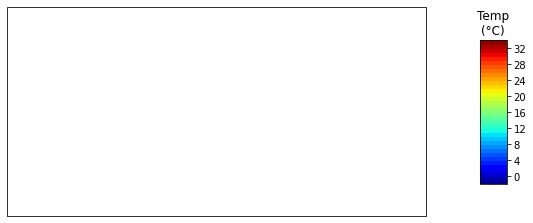

## Make the GIF.  Choose a method.....

In [61]:
import imageio
import os

In [106]:
### option 1.  

images = []
for i in range(0,365):
    filename='sst/sst_{:03d}.png'.format(i)
    images.append(imageio.imread(filename))
#imageio.mimwrite('sst/omg_movie2.gif', images)    
#
imageio.mimsave('sst/omg_movie2.gif', images)
#imageio.mimsave('sst/omg_movie2.mp4', images)


In [ ]:
### option 2
png_dir = 'sst/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        
imageio.mimsave('sst/omg_movie2.gif', images)

In [89]:
!pip install imageio-ffmpeg

     |████████████████████████████████| 22.5 MB 18.0 MB/s eta 0:00:01   |█████▌                          | 3.9 MB 6.5 MB/s eta 0:00:03     |████████████████▎               | 11.4 MB 6.5 MB/s eta 0:00:02     |█████████████████████▎          | 15.0 MB 6.5 MB/s eta 0:00:02     |██████████████████████████████▏ | 21.2 MB 18.0 MB/s eta 0:00:01


https://stackoverflow.com/questions/59014789/making-a-clean-high-quality-gif-with-fix-colorbar-for-multiple-xarray-plots

In [87]:
from PIL import Image  

In [81]:
?imageio.mimsave

In [ ]:
from PIL import Image  
img, *imgs = [Image.open(f) for f in fns_image]
img.save(fp=save_gif_dir+gif_name+'1.gif', format='GIF', append_images=imgs,
     save_all=True, duration=200, loop=0)

## For the old second part of the homework.  Here is the readin and mapping.   We are skipping this year.

In [4]:
# read in teh file for sst.
url=('icec.day.mean.2016.nc')
f=netCDF4.Dataset(url)

# take out the data we need
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
sst=f.variables['icec'][:]
time=f.variables['time'][:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


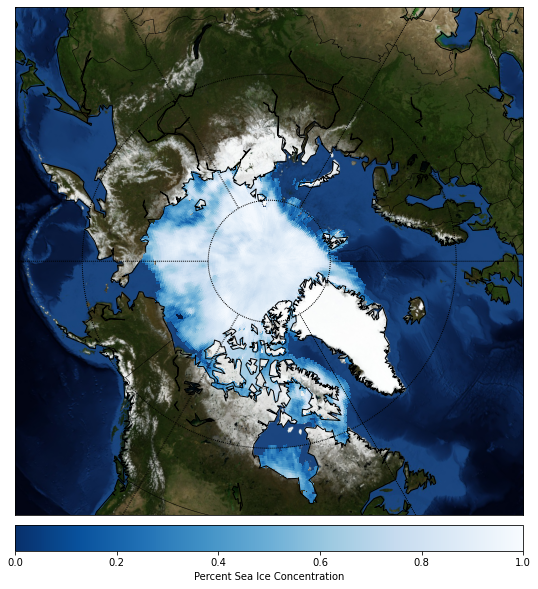

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)

m = Basemap(projection='npstere',boundinglat=50,lon_0=270,ax=ax)
lon_pc, lat_pc = np.meshgrid(lon,lat)
colormap = plt.cm.Blues_r  #online people seem to like this color map. google sea ice map and look at images

m.drawcoastlines()
m.drawcountries()
m.bluemarble()

im=m.pcolormesh(lon_pc,lat_pc,sst[200],vmax=1,vmin=0,cmap=colormap,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))

cbar=m.colorbar(im,'bottom')
cbar.set_label(u'Percent Sea Ice Concentration')

# ANSWERS

In [55]:
startdate=datetime.datetime(1800,1,1)
for nday in np.arange(len(time)):
    datedelta=datetime.timedelta(days=time[nday])
    mapdate=startdate+datedelta
    print ("The date on day {} is {:%B %d, %Y}".format(nday,mapdate))

The date on day 0 is January 01, 2019
The date on day 1 is January 02, 2019
The date on day 2 is January 03, 2019
The date on day 3 is January 04, 2019
The date on day 4 is January 05, 2019
The date on day 5 is January 06, 2019
The date on day 6 is January 07, 2019
The date on day 7 is January 08, 2019
The date on day 8 is January 09, 2019
The date on day 9 is January 10, 2019
The date on day 10 is January 11, 2019
The date on day 11 is January 12, 2019
The date on day 12 is January 13, 2019
The date on day 13 is January 14, 2019
The date on day 14 is January 15, 2019
The date on day 15 is January 16, 2019
The date on day 16 is January 17, 2019
The date on day 17 is January 18, 2019
The date on day 18 is January 19, 2019
The date on day 19 is January 20, 2019
The date on day 20 is January 21, 2019
The date on day 21 is January 22, 2019
The date on day 22 is January 23, 2019
The date on day 23 is January 24, 2019
The date on day 24 is January 25, 2019
The date on day 25 is January 26, 2

Brian's Map January 01, 2019
Brian's Map January 02, 2019


<ipython-input-103-05bb7def12ae>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100))


Brian's Map January 03, 2019
Brian's Map January 04, 2019
Brian's Map January 05, 2019
Brian's Map January 06, 2019
Brian's Map January 07, 2019
Brian's Map January 08, 2019
Brian's Map January 09, 2019
Brian's Map January 10, 2019
Brian's Map January 11, 2019
Brian's Map January 12, 2019
Brian's Map January 13, 2019
Brian's Map January 14, 2019
Brian's Map January 15, 2019
Brian's Map January 16, 2019
Brian's Map January 17, 2019
Brian's Map January 18, 2019
Brian's Map January 19, 2019
Brian's Map January 20, 2019
Brian's Map January 21, 2019
Brian's Map January 22, 2019
Brian's Map January 23, 2019
Brian's Map January 24, 2019
Brian's Map January 25, 2019
Brian's Map January 26, 2019
Brian's Map January 27, 2019
Brian's Map January 28, 2019
Brian's Map January 29, 2019
Brian's Map January 30, 2019
Brian's Map January 31, 2019
Brian's Map February 01, 2019
Brian's Map February 02, 2019
Brian's Map February 03, 2019
Brian's Map February 04, 2019
Brian's Map February 05, 2019
Brian's M

Brian's Map October 26, 2019
Brian's Map October 27, 2019
Brian's Map October 28, 2019
Brian's Map October 29, 2019
Brian's Map October 30, 2019
Brian's Map October 31, 2019
Brian's Map November 01, 2019
Brian's Map November 02, 2019
Brian's Map November 03, 2019
Brian's Map November 04, 2019
Brian's Map November 05, 2019
Brian's Map November 06, 2019
Brian's Map November 07, 2019
Brian's Map November 08, 2019
Brian's Map November 09, 2019
Brian's Map November 10, 2019
Brian's Map November 11, 2019
Brian's Map November 12, 2019
Brian's Map November 13, 2019
Brian's Map November 14, 2019
Brian's Map November 15, 2019
Brian's Map November 16, 2019
Brian's Map November 17, 2019
Brian's Map November 18, 2019
Brian's Map November 19, 2019
Brian's Map November 20, 2019
Brian's Map November 21, 2019
Brian's Map November 22, 2019
Brian's Map November 23, 2019
Brian's Map November 24, 2019
Brian's Map November 25, 2019
Brian's Map November 26, 2019
Brian's Map November 27, 2019
Brian's Map Nove

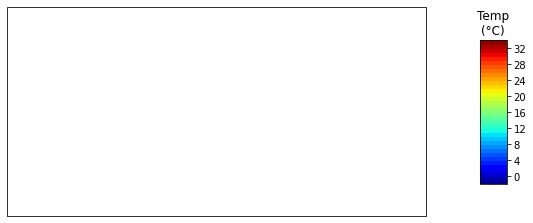

In [103]:
startdate=datetime.datetime(1800,1,1)


fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
levels=np.linspace(-2,34,37)

for nday in np.arange(len(time)):
    datedelta=datetime.timedelta(days=time[nday])
    mapdate=startdate+datedelta
    filename="sst/sst_{:03d}.png".format(nday)
    title="Brian's Map {:%B %d, %Y}".format(mapdate)
    print (title)
    

    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-100)) 
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS,edgecolor='k')
    ax.add_feature(cartopy.feature.LAND,facecolor='xkcd:off white')
    ax.set_title(title)
    
    data, lonW = add_cyclic_point(sst[nday], coord=lon)  # gets rid of white line and use data for plot.

    air_contour=ax.contourf(lonW, lat, data,
                transform=ccrs.PlateCarree(),
                cmap='jet',levels=levels)
    if nday==0:
        cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4])  #x, y, xwidth, y height 
        fig.colorbar(air_contour, cax=cbar_ax)
        cbar_ax.set_title('Temp\n(\N{DEGREE SIGN}C)')

    fig.savefig(filename,dpi=50,bbox_inches='tight',facecolor='white')  

    ax.cla()